# Logestic Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(2)

(863, 14)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0


# Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('result',axis=1))
scaled_features = scaler.transform(df.drop('result',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat=df_feat.drop(['location','country'] , axis=1)
df_feat

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
...,...,...,...,...,...,...,...,...,...,...,...
858,1.585683,-1.685416,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
859,1.585683,-0.955511,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
860,0.207592,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
861,0.207592,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(df_feat , df['result'], test_size=0.2)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem , y_rem , test_size=0.5)

Now we have:

- x_train and y_train ,, 80% of the data
- x_valid and y_valid ,, 10% of the data
- x_test and y_test ,, 10% of the data

# Training and Validation

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [7]:
predictions = logmodel.predict(x_valid)

In [8]:
from sklearn.metrics import classification_report

In [9]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        81
           1       0.75      0.60      0.67         5

    accuracy                           0.97        86
   macro avg       0.86      0.79      0.82        86
weighted avg       0.96      0.97      0.96        86



As we can see, because of the impalanced of the dataset, the results of metrics for class 1 is not so good.

We need to do a data impalanced technique to deal with this problem

# SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x_train, y_train)
df2 = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [11]:
df2

,result,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0,1.585683,0.000000,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
1,0,1.585683,0.000000,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,0,-1.170499,-0.291962,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
3,0,0.207592,-0.159252,-0.471571,-0.347533,-1.536471,-2.811969,0.244914,0.135161,0.054668,0.03406,2.971339
4,0,0.207592,-1.419996,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,0.426162
...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1,-1.029641,1.373694,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
1194,1,0.207592,1.666339,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
1195,1,0.207592,0.745149,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
1196,1,0.207592,2.331683,-0.471571,-0.347533,-1.455802,-1.488496,-5.312620,-9.968892,0.054668,0.03406,4.175564


In [12]:
logmodel = LogisticRegression()
logmodel.fit(df2.drop('result',axis=1) , df2['result'])

LogisticRegression()

In [13]:
predictions = logmodel.predict(x_valid)

In [14]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        81
           1       0.40      0.80      0.53         5

    accuracy                           0.92        86
   macro avg       0.69      0.86      0.74        86
weighted avg       0.95      0.92      0.93        86



# Our Model on Test data

In [15]:
pred=logmodel.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[67  8]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        75
           1       0.60      1.00      0.75        12

    accuracy                           0.91        87
   macro avg       0.80      0.95      0.85        87
weighted avg       0.94      0.91      0.92        87



C:\Users\Adel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


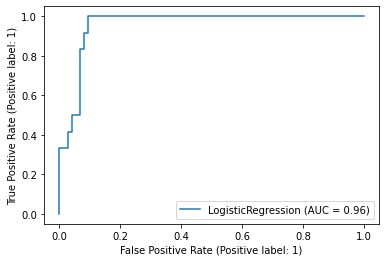

In [18]:
from sklearn import metrics
metrics.plot_roc_curve(logmodel, x_test, y_test)
plt.show()

# Thank You